### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

### Load NSL-KDD dataset


In [2]:
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
                "num_failed_logins", "logged_in", "num_compromised", "root_shell",
                "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
                "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
                "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                "dst_host_srv_rerror_rate", "label"]
df = pd.read_csv(url, names=column_names)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### Drop non-numeric columns and label column

In [3]:
# Drop non-numeric columns and label column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

### Heatmap of Correlation between Features


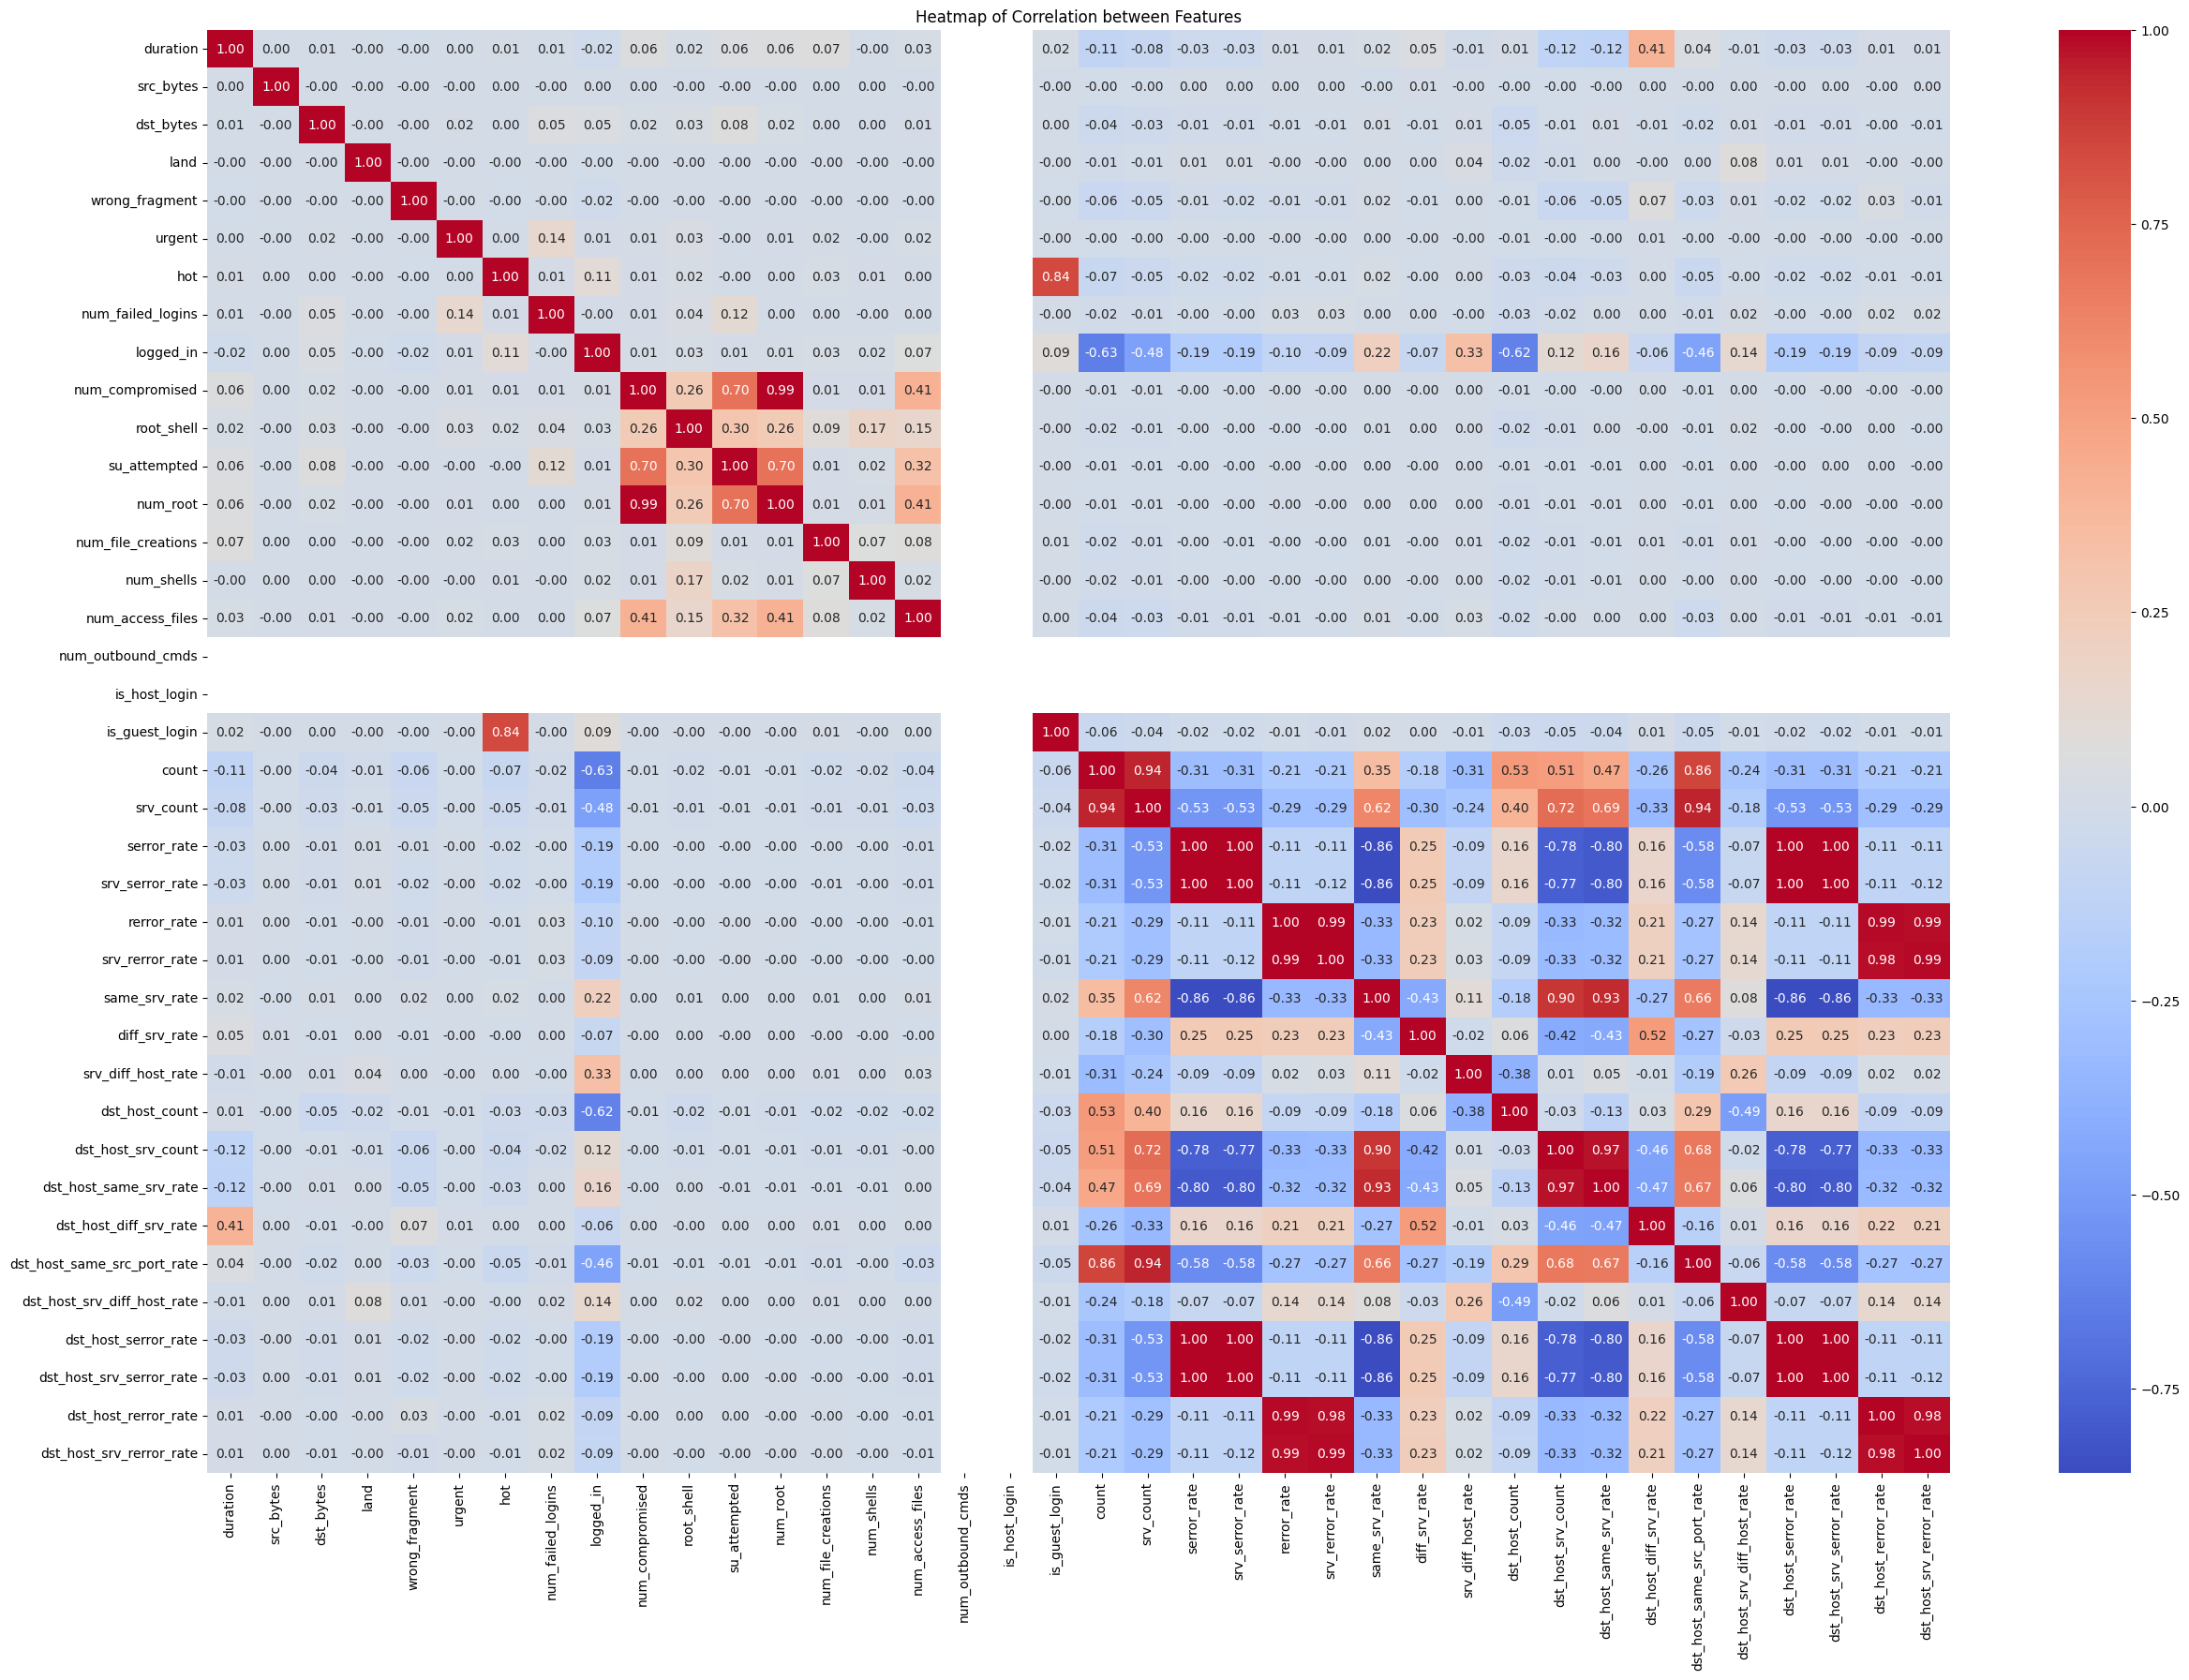

In [4]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Features')
plt.show()

### Data Pre-processing

In [5]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

### Define the autoencoder model

In [6]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(20, activation='relu'),
    Dense(X_train.shape[1])
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

### Train the autoencoder

In [8]:
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/5
  442/12351 [>.............................] - ETA: 22s - loss: 0.3897

KeyboardInterrupt: 

### Training and Validation Loss Over Epochs

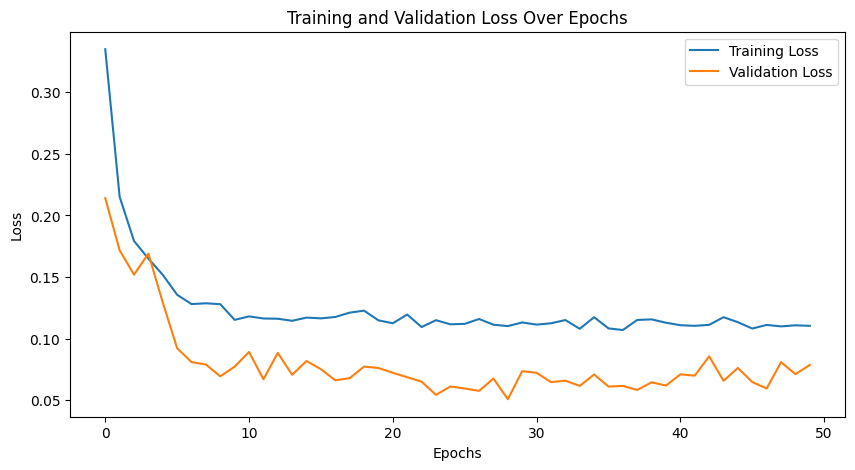

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluating the model

In [ ]:
# Use the trained autoencoder to encode and decode the test data
encoded_data = model.predict(X_test)

# Evaluate the reconstruction error
mse = np.mean(np.square(X_test - encoded_data))
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07856180458344805


### Function to detect anomalies

In [ ]:
# Function to detect anomalies
def detect_anomalies(X_test, threshold):
    reconstructed = model.predict(X_test)
    reconstruction_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)
    anomaly_indices = np.where(reconstruction_errors > threshold)[0]
    return anomaly_indices, reconstruction_errors

In [ ]:
threshold = 0.3  
anomaly_indices, reconstruction_errors = detect_anomalies(X_test, threshold)
print("Anomaly indices:", anomaly_indices)
print("Reconstruction errors:", reconstruction_errors)

Anomaly indices: [  326   554   561   775   953   955  1222  1226  1376  1389  1553  1731
  1757  2363  2500  2566  2834  2987  3178  3421  3488  3815  3932  3963
  4153  4164  4376  4584  4624  4694  4907  5213  5247  5673  5724  5875
  6165  6421  6436  6621  6856  6949  6974  7507  7562  7743  7752  8143
  8221  8230  8660  8725  8829  8937  9011  9149  9198  9339  9409  9544
  9703  9758  9763 10111 10260 10282 10355 10610 10641 10737 10841 11401
 11451 12010 12153 12184 12428 12505 12640 12845 12929 13110 13594 13620
 13653 13753 13913 14065 14500 14538 14996 15077 15158 15186 15193 15448
 15682 15734 15896 15949 16116 16209 16257 16263 16600 16679 16945 17314
 17803 17859 17990 18166 18524 18869 18932 19288 19409 19713 20388 20591
 21105 21408 21552 21580 21768 22337 22456 22596 22636 22655 22826 23105
 23237 23281 23377 23748 23900 23944 24065 24457 24490 24530 25016 25127
 25191 25280 25317 25656 25839 25903 26624 26642 26702 26889 27239 27414
 27501 27576 27711 27790 28129 282

### Scatter Plot of Reconstruction Errors vs. Data Indices


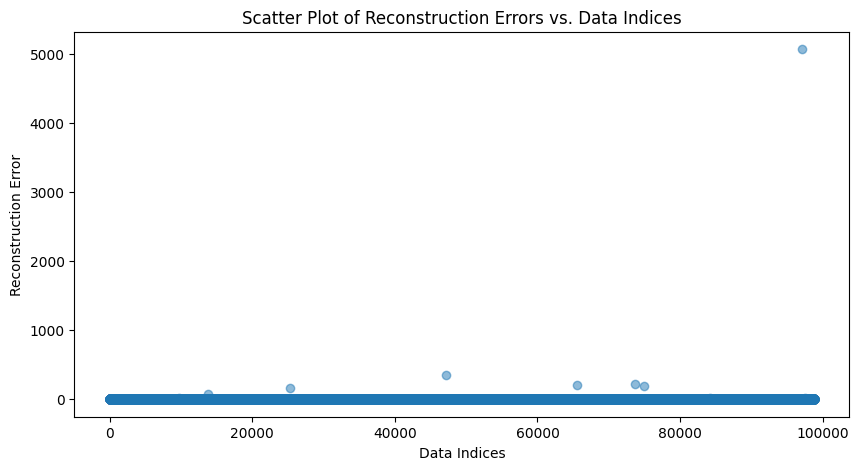

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, alpha=0.5)
plt.title('Scatter Plot of Reconstruction Errors vs. Data Indices')
plt.xlabel('Data Indices')
plt.ylabel('Reconstruction Error')
plt.show()

### Threshold Line on Reconstruction Error Scatter Plot

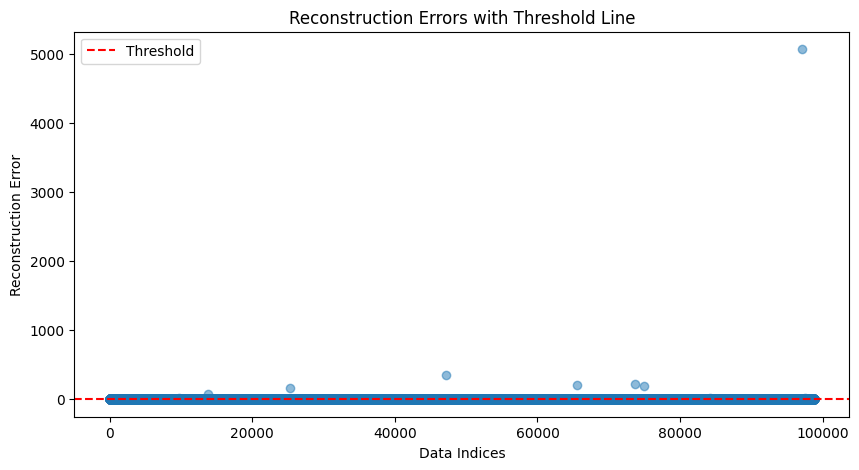

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, alpha=0.5)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Errors with Threshold Line')
plt.xlabel('Data Indices')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()